In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
csv_file = '/Users/robert/src/MachineLearning/processed_result/'
sname = ["ted", "Lei", "Lema", "Erin", "Claire", "jaden", "wenxin"]
lblList = ['Relaxation', 'CPT Test', 'Stroop Test', 'Math Test', 'Video 1', 'Video 2']
sc = 'Shimmer_FCF4_GSR_Skin_Conductance_CAL'
eda = 'Normalized_GSR'
lbl = 'Event_Label'

sf_EDA = 4
#sf_SC = 4

Process the file 

In [4]:
def csv_tonp(csv_file, sname):
    df = pd.read_csv(csv_file)
    df_eda = df[eda].values.reshape(-1, 1)
    #df_SC = df[sc].values.reshape(-1, 1)
    df_lbl = df[lbl]

    n_eda = len(df_eda)
    #n_SC = len(df_SC)
    
    sname_eda = np.repeat(sname, n_eda).reshape(-1, 1)
    # need to convert the label to the integer values 
    df_lbl = pd.Categorical(df_lbl, categories=lblList).codes.reshape(-1, 1)
    
    print("Processing data for name: ", sname)

    data = np.concatenate((sname_eda, df_eda, df_lbl), axis = 1)
    #print("Data shape: ", data.shape)
    #print(data)

    return data

Merge the data

In [5]:
for i, name in enumerate(sname):
    csv_path = csv_file + name + '.csv'
    print()
    print("Processing file: ", csv_path)
    if i == 0:
        data = csv_tonp(csv_path, name)
        print("Data shape: ", data.shape)
    else:
        last_data = csv_tonp(csv_path, name)
        print("Data shape: ", last_data.shape)
        data = np.concatenate((data, last_data), axis = 0)
        print("Data shape: ", data.shape)
    
merged_data_path = '/Users/robert/src/MachineLearning/processed_result/merged_data.csv'
columns = ['Name', 'EDA', 'Label']
df = pd.DataFrame(data, columns = columns)
df.to_csv(merged_data_path, index = False)
print("Data saved to: ", merged_data_path)


Processing file:  /Users/robert/src/MachineLearning/processed_result/ted.csv
Processing data for name:  ted
Data shape:  (2107613, 3)

Processing file:  /Users/robert/src/MachineLearning/processed_result/Lei.csv
Processing data for name:  Lei
Data shape:  (1948399, 3)
Data shape:  (4056012, 3)

Processing file:  /Users/robert/src/MachineLearning/processed_result/Lema.csv
Processing data for name:  Lema
Data shape:  (2054157, 3)
Data shape:  (6110169, 3)

Processing file:  /Users/robert/src/MachineLearning/processed_result/Erin.csv
Processing data for name:  Erin
Data shape:  (1850465, 3)
Data shape:  (7960634, 3)

Processing file:  /Users/robert/src/MachineLearning/processed_result/Claire.csv
Processing data for name:  Claire
Data shape:  (1792392, 3)
Data shape:  (9753026, 3)

Processing file:  /Users/robert/src/MachineLearning/processed_result/jaden.csv
Processing data for name:  jaden
Data shape:  (1675646, 3)
Data shape:  (11428672, 3)

Processing file:  /Users/robert/src/MachineL

Check final merge data

Plot each subject's data


Index(['Name', 'EDA', 'Label'], dtype='object')


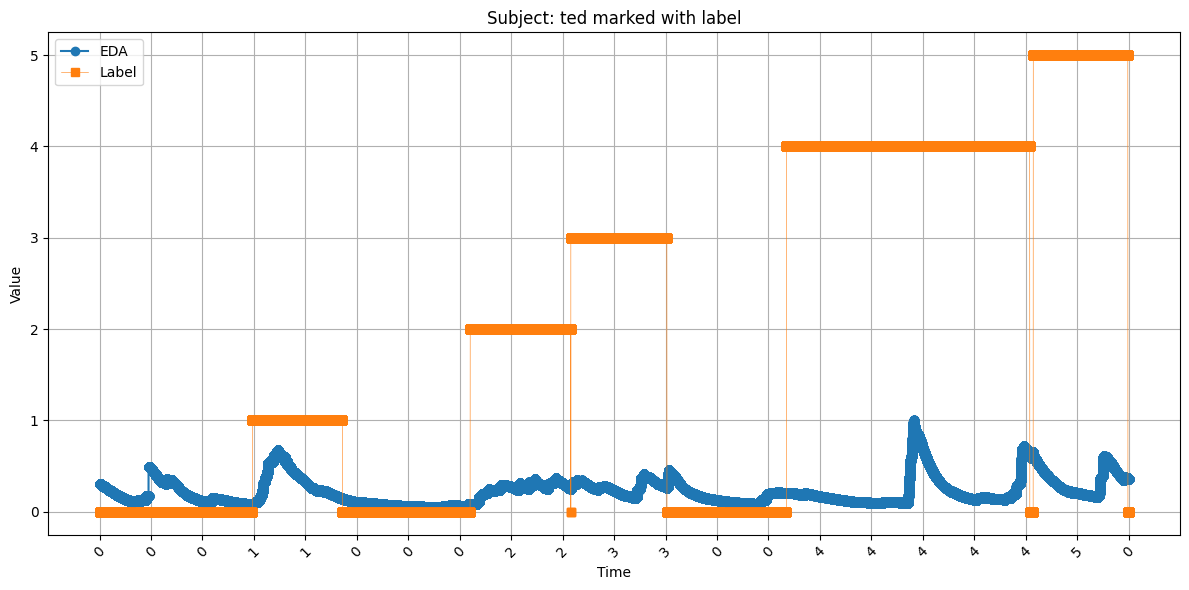

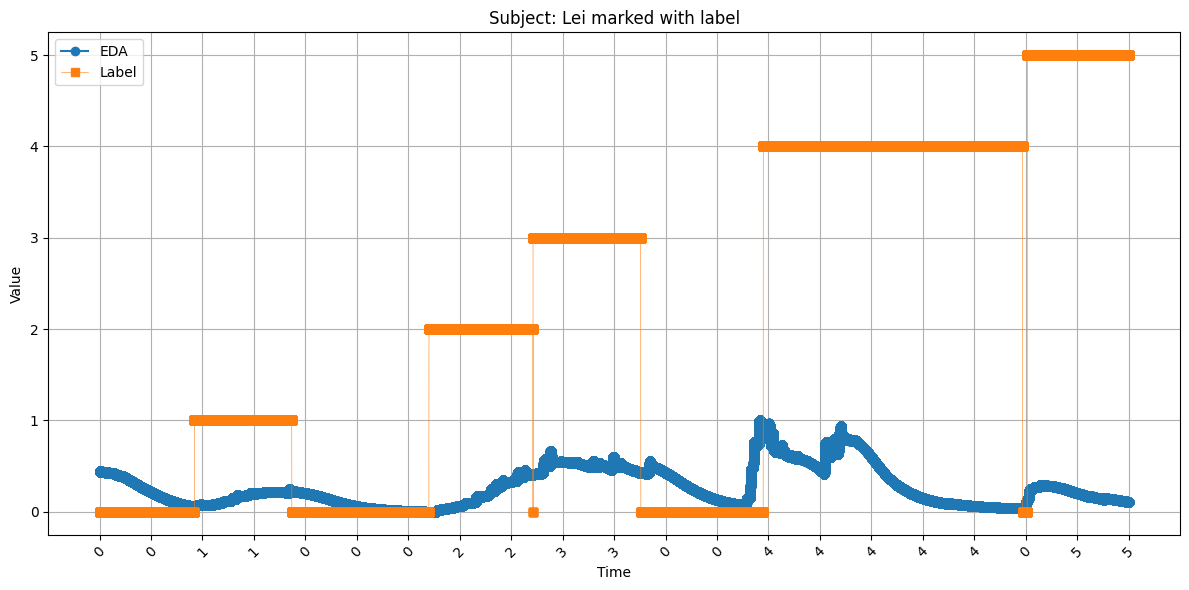

/Users/robert/.pyenv/versions/3.10.12/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


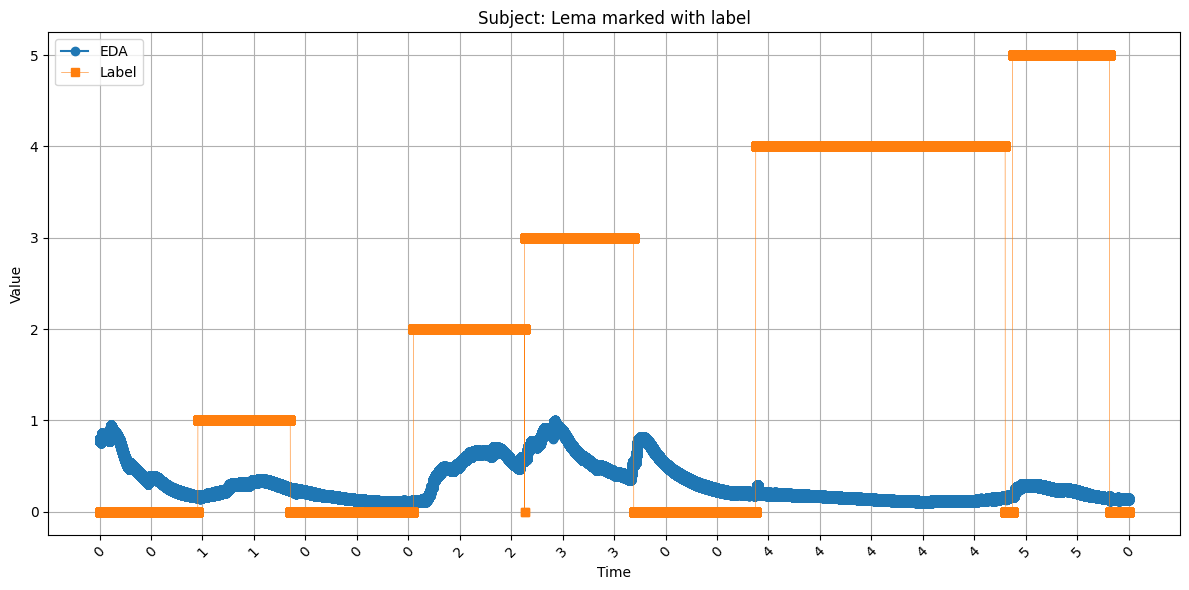

/var/folders/57/pmkv9m9x4k164694h0ydwv540000gn/T/ipykernel_88312/1184060356.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/robert/.pyenv/versions/3.10.12/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


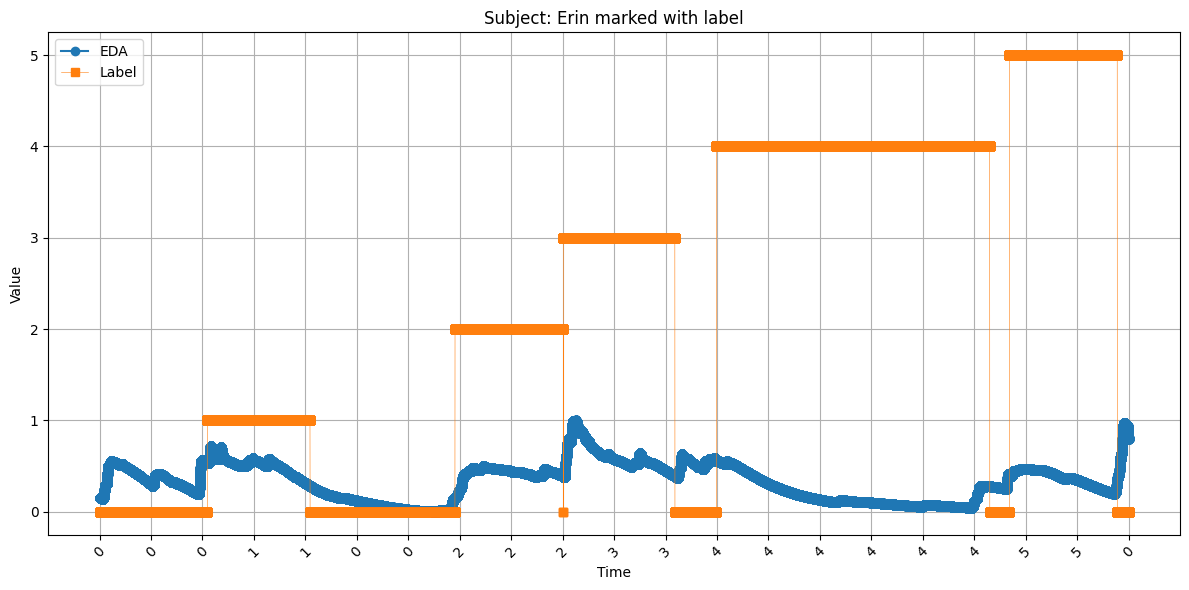

/var/folders/57/pmkv9m9x4k164694h0ydwv540000gn/T/ipykernel_88312/1184060356.py:26: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


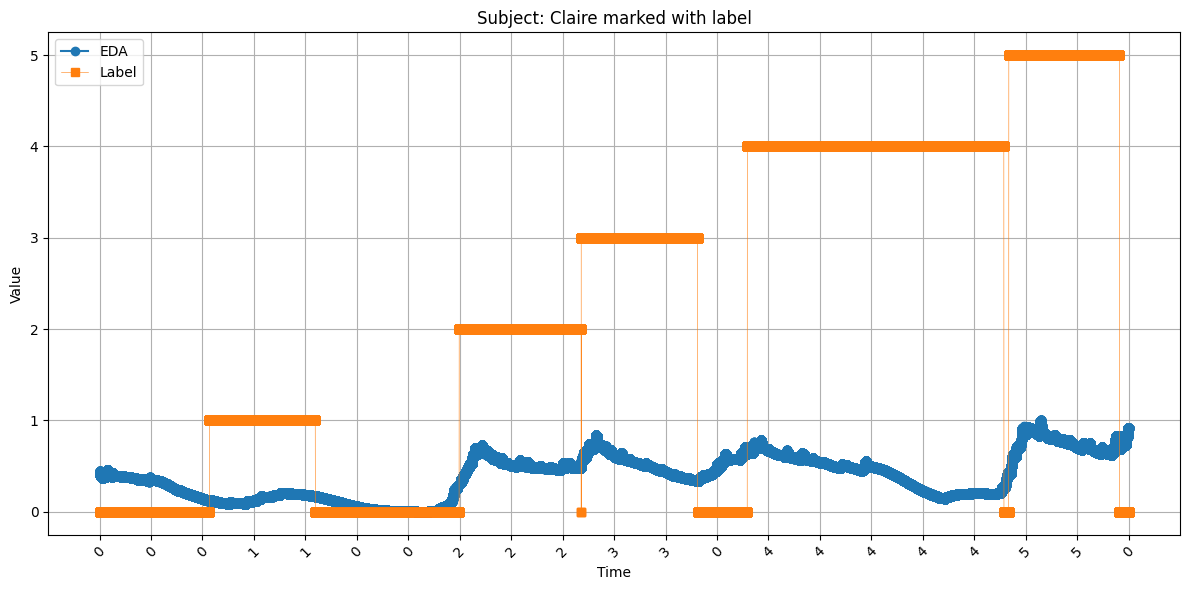

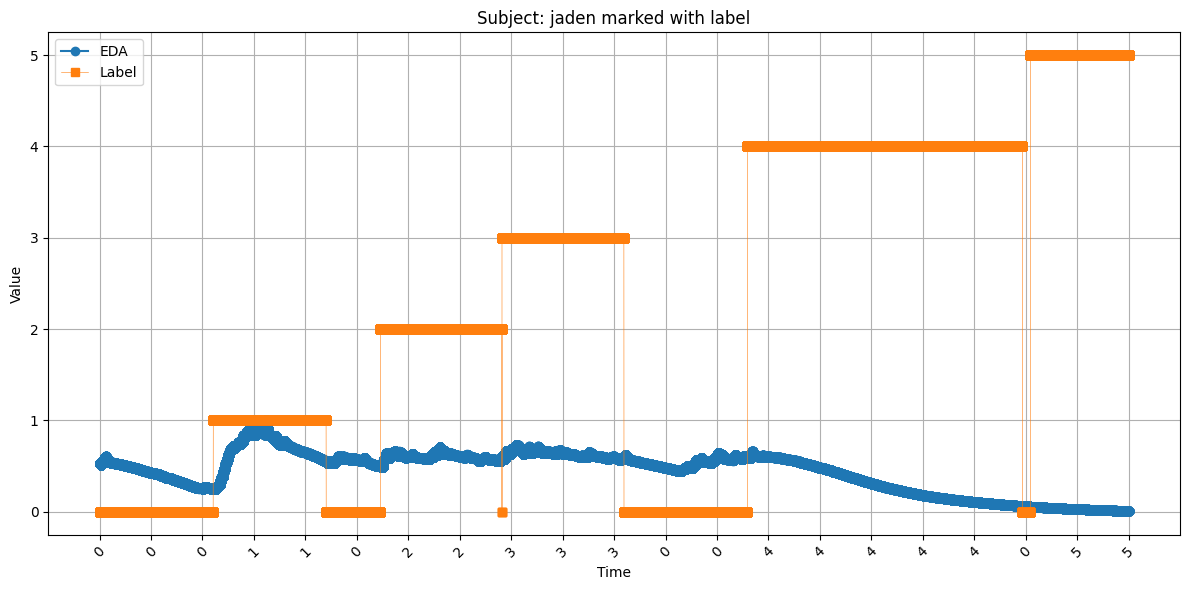

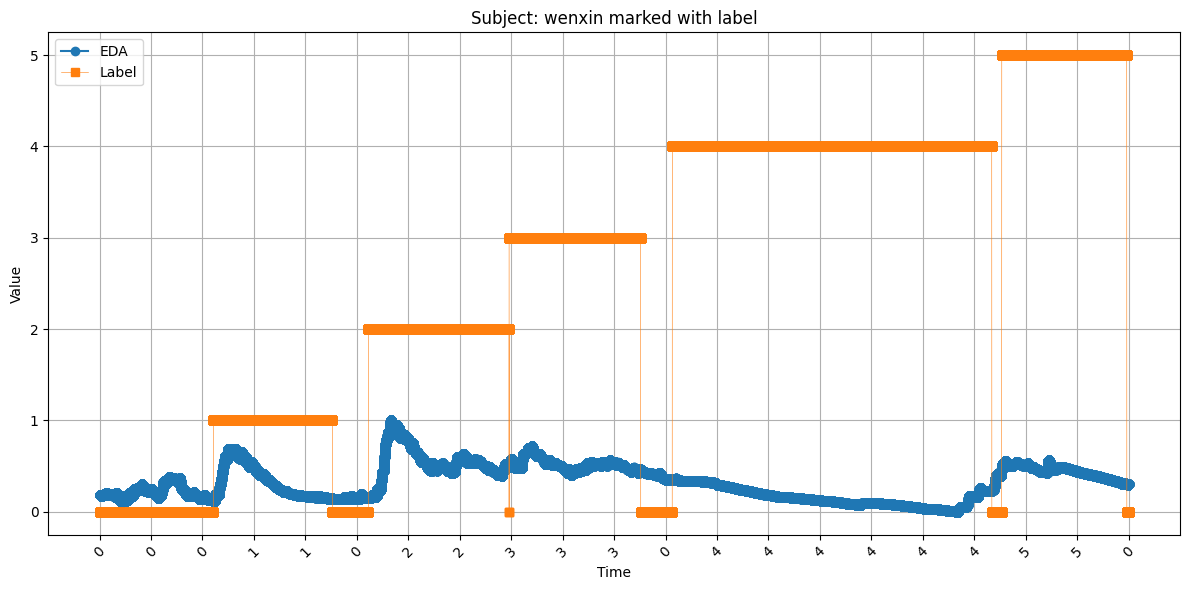

In [7]:
merged_data_path = '/Users/robert/src/MachineLearning/processed_result/merged_data.csv'
df = pd.read_csv(merged_data_path)
print(df.columns)
for name in sname:
    df_s = df[df["Name"] == name]
    plt.figure(figsize=(12, 6))

    # Plot EDA and SC using the DataFrame's default index as the x-axis (time)
    plt.plot(df_s.index, df_s['EDA'], marker='o', label='EDA')
    plt.plot(df_s.index, df_s['Label'], marker='s', label='Label', linewidth=0.4)

    # for i, label_value in enumerate(df_s['Label']):
    #     plt.text(i, label_value, str(label_value), fontsize=8, ha='center', va='bottom', rotation=45)

    plt.xlabel('Time')  # Using the default index as time
    plt.ylabel('Value')
    plt.title('Subject: ' + name + ' marked with label') 

    # To avoid cluttering, we set tick labels on the x-axis using the 'Label' column.
    # Here, we're choosing every nth label. Adjust 'n' as needed.
    n = max(1, len(df_s) // 20)
    plt.xticks(ticks=df_s.index[::n], labels=df_s['Label'][::n], rotation=45)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()    
